In [ ]:
%%bash
source $CONDA_PREFIX/etc/conda/activate.d/env_vars.sh
echo $LD_LIBRARY_PATH

bash: /home/user/anaconda3/envs/tf/lib/libtinfo.so.6: no version information available (required by bash)


:/home/user/anaconda3/envs/tf/lib/:/home/user/anaconda3/envs/tf/lib/python3.9/site-packages/nvidia/cudnn/lib:/home/user/anaconda3/envs/tf/lib/:/home/user/anaconda3/envs/tf/lib/python3.9/site-packages/nvidia/cudnn/lib


In [ ]:
import os
import cv2
from PIL import Image
import numpy as np
from matplotlib import pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.optimizers import Adam
import glob

2023-04-30 21:01:22.408807: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-04-30 21:01:22.440321: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-04-30 21:01:22.946727: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [ ]:
import tensorflow as tf

In [ ]:
os.environ['TF_GPU_ALLOCATOR'] = 'cuda_malloc_async'
print(os.getenv('TF_GPU_ALLOCATOR'))

cuda_malloc_async


In [ ]:
print(tf.config.list_physical_devices('GPU'))

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


2023-04-30 21:01:24.943528: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-04-30 21:01:24.971218: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-04-30 21:01:24.971339: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysf

In [ ]:
physical_devices = tf.config.list_physical_devices('GPU')
tf.config.experimental.set_memory_growth(physical_devices[0], True)

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
image_directory = '../voc_multi_semantic_seg_dataset/PNGImages/*'
mask_directory = '../voc_multi_semantic_seg_dataset/SegmentationClassPNG/*'
whu_image_directory = '../Satellite_dataset(global cities)/image/*'
whu_mask_directory = '../Satellite_dataset(global cities)/label/*'

In [ ]:
image_names = glob.glob(image_directory)
image_names

['../voc_multi_semantic_seg_dataset/PNGImages/28-12-2022_15-43-11.png',
 '../voc_multi_semantic_seg_dataset/PNGImages/28-12-2022_15-39-39.png',
 '../voc_multi_semantic_seg_dataset/PNGImages/28-12-2022_15-41-20.png',
 '../voc_multi_semantic_seg_dataset/PNGImages/28-12-2022_15-36-35.png',
 '../voc_multi_semantic_seg_dataset/PNGImages/28-12-2022_14-02-02.png',
 '../voc_multi_semantic_seg_dataset/PNGImages/28-12-2022_15-38-38.png',
 '../voc_multi_semantic_seg_dataset/PNGImages/28-12-2022_15-37-31.png',
 '../voc_multi_semantic_seg_dataset/PNGImages/28-12-2022_15-28-38.png',
 '../voc_multi_semantic_seg_dataset/PNGImages/28-12-2022_15-28-46.png',
 '../voc_multi_semantic_seg_dataset/PNGImages/28-12-2022_15-34-52.png',
 '../voc_multi_semantic_seg_dataset/PNGImages/28-12-2022_15-44-42.png',
 '../voc_multi_semantic_seg_dataset/PNGImages/28-12-2022_15-46-13.png',
 '../voc_multi_semantic_seg_dataset/PNGImages/28-12-2022_15-40-16.png',
 '../voc_multi_semantic_seg_dataset/PNGImages/28-12-2022_15-37-1

In [ ]:
mask_names = glob.glob(mask_directory)
mask_names

['../voc_multi_semantic_seg_dataset/SegmentationClassPNG/28-12-2022_15-43-11.png',
 '../voc_multi_semantic_seg_dataset/SegmentationClassPNG/28-12-2022_15-39-39.png',
 '../voc_multi_semantic_seg_dataset/SegmentationClassPNG/28-12-2022_15-41-20.png',
 '../voc_multi_semantic_seg_dataset/SegmentationClassPNG/28-12-2022_15-36-35.png',
 '../voc_multi_semantic_seg_dataset/SegmentationClassPNG/28-12-2022_14-02-02.png',
 '../voc_multi_semantic_seg_dataset/SegmentationClassPNG/28-12-2022_15-38-38.png',
 '../voc_multi_semantic_seg_dataset/SegmentationClassPNG/28-12-2022_15-37-31.png',
 '../voc_multi_semantic_seg_dataset/SegmentationClassPNG/28-12-2022_15-28-38.png',
 '../voc_multi_semantic_seg_dataset/SegmentationClassPNG/28-12-2022_15-28-46.png',
 '../voc_multi_semantic_seg_dataset/SegmentationClassPNG/28-12-2022_15-34-52.png',
 '../voc_multi_semantic_seg_dataset/SegmentationClassPNG/28-12-2022_15-44-42.png',
 '../voc_multi_semantic_seg_dataset/SegmentationClassPNG/28-12-2022_15-46-13.png',
 '..

In [ ]:
image_names.sort()
images = [cv2.imread(img) for img in image_names]
images = [cv2.cvtColor(img, cv2.COLOR_BGR2RGB) for img in images]
images = [cv2.resize(img, (256, 256), interpolation = cv2.INTER_AREA) for img in images]
image_dataset = np.array(images)
# image_dataset = np.expand_dims(image_dataset, axis=3)

In [ ]:
mask_names.sort()
masks = [cv2.imread(mask, 0) for mask in mask_names]
masks = [cv2.resize(mask, (256, 256), interpolation = cv2.INTER_AREA) for mask in masks]
mask_dataset = np.array(masks)
mask_dataset = np.expand_dims(mask_dataset, axis=3)

In [ ]:
print("Image data shape is: ", image_dataset.shape)
print("Mask data shape is: ", mask_dataset.shape)
print("Max pixel value in image is: ", image_dataset.max())
print("Labels in the mask are : ", np.unique(mask_dataset))

Image data shape is:  (124, 256, 256, 3)
Mask data shape is:  (124, 256, 256, 1)
Max pixel value in image is:  255
Labels in the mask are :  [  0   4   5   7  10  11  13  14  19  22  23  24  26  28  29  32  33  35
  36  38  39  41  42  43  45  47  49  51  52  54  56  57  60  61  64  66
  67  68  70  71  73  74  75  76  77  79  80  83  85  86  89  92  94  95
  96  98  99 100 101 106 107 109 113 117 118 121 124 128]


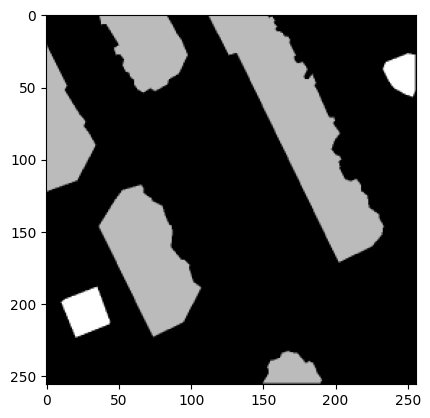

In [ ]:
plt.imshow(mask_dataset[0, :, :, 0], cmap='gray')

In [ ]:
mask_labels = np.unique(mask_dataset)
for mask in mask_dataset:
    for i, val in enumerate(mask_labels):
        mask[mask == val] = i
print("Labels in the mask are : ", np.unique(mask_dataset))

Labels in the mask are :  [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67]


In [ ]:
#binary segmentation
for mask in mask_dataset:
    mask[mask > 0] = 1
print("Labels in the mask are : ", np.unique(mask_dataset))

Labels in the mask are :  [0 1]


In [ ]:
image_dataset = image_dataset / 255.
# mask_dataset = mask_dataset /255.

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(image_dataset, mask_dataset, test_size=0.15, random_state=42)

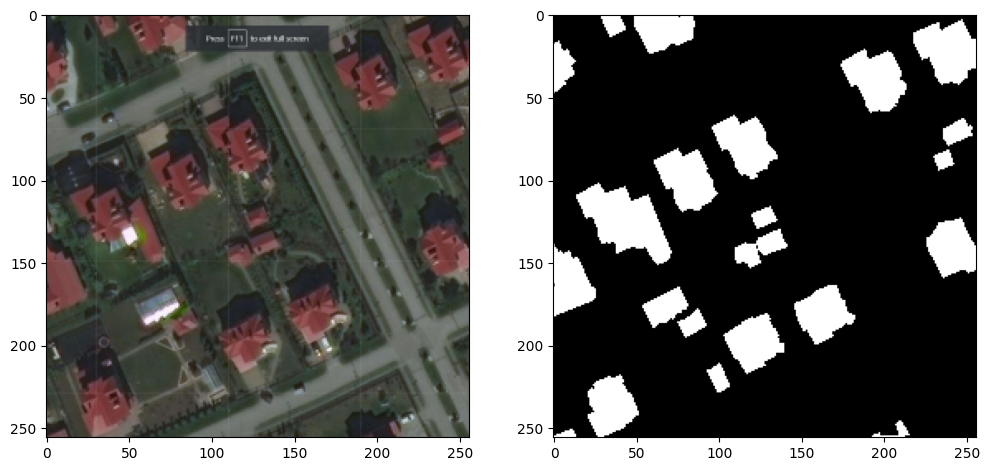

In [ ]:
import random

image_number = random.randint(0, len(X_train) - 1)
plt.figure(figsize=(12, 6))
plt.subplot(121)
plt.imshow(X_train[image_number, :, :, :])
plt.subplot(122)
plt.imshow(y_train[image_number, :, :, 0], cmap='gray')
plt.show()

In [ ]:
from keras.models import Model
from keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D, concatenate, Conv2DTranspose, BatchNormalization, \
    Dropout, Lambda
from keras.optimizers import Adam
from keras.layers import Activation, MaxPool2D, Concatenate, Add, Multiply

def bottleneck_block(input, num_filters):
    x_skip = Conv2D(num_filters, kernel_size=(1,1), padding="same")(input)
    x_skip = BatchNormalization(axis=3)(x_skip)

    x = Conv2D(num_filters/4, kernel_size=(1,1), padding="same")(input)
    x = BatchNormalization(axis=3)(x)
    x = Activation("relu")(x)

    x = Conv2D(num_filters/4, kernel_size=(3,3), padding="same")(x)
    x = BatchNormalization(axis=3)(x)
    x = Activation("relu")(x)

    x = Conv2D(num_filters, kernel_size=(1,1), padding="same")(x)
    x = BatchNormalization(axis=3)(x)

    x = Add()([x, x_skip])
    x = Activation("relu")(x)

    return x

def attention_gate(skip_input, gate_signal):
    num_filters = skip_input.shape[3]

    x = Conv2D(num_filters, kernel_size=(1,1), padding="same")(skip_input)

    x_gate = Conv2DTranspose(num_filters, kernel_size=(1,1), strides=2, padding="same")(gate_signal)
    x_gate = Conv2D(num_filters, kernel_size=(1, 1), padding="same")(x_gate)

    x = Add()([x, x_gate])
    x = Activation("relu")(x)
    x = Conv2D(num_filters, kernel_size=(1, 1), padding="same")(x)
    x = Activation("sigmoid")(x)
    x = Multiply()([skip_input, x])

    return x

def aspp(input, num_filers):
    input_filters = input.shape[3]

    x1 = Conv2D(input_filters, kernel_size=(3,3), padding="same")(input)
    x2 = Conv2D(input_filters, kernel_size=(3,3), dilation_rate=6, padding='same')(input)
    x3 = Conv2D(input_filters, kernel_size=(3,3), dilation_rate=12, padding='same')(input)
    x4 = Conv2D(input_filters, kernel_size=(3,3), dilation_rate=18, padding='same')(input)

    x = Add()([x1, x2, x3, x4])
    x = Conv2D(num_filers, kernel_size=(1,1), padding="same")(x)

    return x

#Encoder block: Conv block followed by maxpooling
def encoder_block(input, num_filters, num_bottlenecks):
    s = bottleneck_block(input, num_filters)
    for _ in range(num_bottlenecks-1):
        s = bottleneck_block(s, num_filters)

    p = Conv2D(num_filters, kernel_size=(1,1), strides=2, padding="same")(s)
    return s, p

#Decoder block
#skip features gets input from encoder for concatenation
def decoder_block(input, skip_features, num_filters):
    input_filters = input.shape[3]

    x = Conv2DTranspose(input_filters, kernel_size=(2, 2), strides=2, padding="same")(input)

    gate_features = attention_gate(skip_features, input)
    x = Concatenate()([x, gate_features])

    x = Conv2D(num_filters, kernel_size=(3,3), padding="same")(x)
    x = Activation("relu")(x)

    x = Conv2D(num_filters, kernel_size=(3,3), padding="same")(x)
    x = Activation("relu")(x)

    return x


#Build net using the blocks
def build_net(input_shape, n_classes):
    inputs = Input(input_shape)

    p0 = Conv2D(filters=64, kernel_size=(7,7), strides=2, padding="same")(inputs)

    s1, p1 = encoder_block(p0, num_filters=64, num_bottlenecks=3)

    s2, p2 = encoder_block(p1, num_filters=128, num_bottlenecks=4)

    s3, p3 = encoder_block(p2, num_filters=256, num_bottlenecks=6)

    s4, _ = encoder_block(p3, num_filters=512, num_bottlenecks=3)

    b1 = aspp(s4, 512)  #Bridge

    d1 = decoder_block(b1, s3, 512)
    d2 = decoder_block(d1, s2, 256)
    d3 = decoder_block(d2, s1, 128)

    d4 = Conv2DTranspose(filters=64, kernel_size=(2,2), strides=2, padding="same")(d3)

    if n_classes == 1:  #Binary
        activation = 'sigmoid'
    else:
        activation = 'softmax'

    outputs = Conv2D(filters=n_classes, kernel_size=(1,1), padding="same", activation=activation)(d4)  #Change the activation based on n_classes
    print(activation)

    model = Model(inputs, outputs, name="AG-ResNet")
    return model

In [ ]:
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath='/content/drive/MyDrive/Colab Notebooks/SatelliteBuildingRecognition/saved_models/checkpoints/with_whu/weights.159_{epoch:02d}.hdf5',
    save_weights_only=True,
    monitor='val_accuracy',
    save_best_only=False,
    save_freq=600,
    verbose=1)

early_stopping_callback = tf.keras.callbacks.EarlyStopping(monitor='loss',
                                                           patience=10)

In [ ]:
IMG_HEIGHT = image_dataset.shape[1]
IMG_WIDTH = image_dataset.shape[2]
IMG_CHANNELS = image_dataset.shape[3]

In [ ]:
print(image_dataset.shape)

(124, 256, 256, 3)


In [ ]:
input_shape = (IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS)
model = build_net(input_shape, n_classes=1)
model.compile(optimizer=Adam(learning_rate=1e-2),
              loss='binary_crossentropy', 
              metrics=['accuracy'])
model.summary()

2023-04-30 21:01:48.485899: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-04-30 21:01:48.486075: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-04-30 21:01:48.486148: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysf

sigmoid
Model: "AG-ResNet"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 128, 128, 64  9472        ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 conv2d_2 (Conv2D)              (None, 128, 128, 16  1040        ['conv2d[0][0]']                 
                                )                                                 

In [ ]:
history = model.fit(X_train, y_train,
                    batch_size=1,
                    verbose=1,
                    epochs=100,
                    validation_data=(X_test, y_test),
                    # callbacks=[model_checkpoint_callback],
                    shuffle=False)

Epoch 1/100


2023-04-30 21:02:02.098482: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:424] Loaded cuDNN version 8600
2023-04-30 21:02:02.533508: I tensorflow/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2023-04-30 21:02:08.753260: E tensorflow/compiler/xla/stream_executor/gpu/gpu_cudamallocasync_allocator.cc:306] gpu_async_0 cuMemAllocAsync failed to allocate 2299002880 bytes: CUDA error: out of memory (CUDA_ERROR_OUT_OF_MEMORY)
 Reported by CUDA: Free memory/Total memory: 856358912/4102881280
2023-04-30 21:02:08.753289: E tensorflow/compiler/xla/stream_executor/gpu/gpu_cudamallocasync_allocator.cc:311] Stats: Limit:                      2183856128
InUse:                       569049588
MaxInUse:                   1168049652
NumAllocs:                        5478
MaxAllocSize:                568852480
Reserved:                            0
PeakReserved:                        0
LargestFreeBlock:                    0

2023-04-30 21

105/105 [==============================] - 26s 102ms/step - loss: 669641.1250 - accuracy: 0.6591 - val_loss: 0.6214 - val_accuracy: 0.6906
Epoch 2/100
105/105 [==============================] - 10s 94ms/step - loss: 0.6020 - accuracy: 0.7126 - val_loss: 0.6212 - val_accuracy: 0.6906
Epoch 3/100
105/105 [==============================] - 10s 95ms/step - loss: 0.6021 - accuracy: 0.7126 - val_loss: 0.6212 - val_accuracy: 0.6906
Epoch 4/100
 36/105 [=========>....................] - ETA: 6s - loss: 0.6299 - accuracy: 0.6794

KeyboardInterrupt: 

In [ ]:
# model.load_weights('/content/drive/MyDrive/Colab Notebooks/SatelliteBuildingRecognition/saved_models/checkpoints/with_whu/weights.159_98.hdf5')

In [ ]:
# model.save('/content/drive/MyDrive/Colab Notebooks/SatelliteBuildingRecognition/saved_models/ag_resnet_whu_60.hdf5')

In [26]:
y_pred=model.predict(X_test[0:14])
y_pred_thresholded = y_pred > 0.5
from tensorflow.keras.metrics import MeanIoU
n_classes = 2
IOU_keras = MeanIoU(num_classes=n_classes)  
IOU_keras.update_state(y_pred_thresholded, y_test[0:14])
print("Mean IoU =", IOU_keras.result().numpy())

2023-04-30 19:12:12.958028: E tensorflow/compiler/xla/stream_executor/gpu/gpu_cudamallocasync_allocator.cc:306] gpu_async_0 cuMemAllocAsync failed to allocate 1282408448 bytes: CUDA error: out of memory (CUDA_ERROR_OUT_OF_MEMORY)
 Reported by CUDA: Free memory/Total memory: 856358912/4102881280
2023-04-30 19:12:12.958058: E tensorflow/compiler/xla/stream_executor/gpu/gpu_cudamallocasync_allocator.cc:311] Stats: Limit:                      2183856128
InUse:                      1051052848
MaxInUse:                   1563872048
NumAllocs:                     8656507
MaxAllocSize:                724566016
Reserved:                            0
PeakReserved:                        0
LargestFreeBlock:                    0

2023-04-30 19:12:12.958098: E tensorflow/compiler/xla/stream_executor/gpu/gpu_cudamallocasync_allocator.cc:63] Histogram of current allocation: (allocation_size_in_bytes, nb_allocation_of_that_sizes), ...;
2023-04-30 19:12:12.958102: E tensorflow/compiler/xla/stream_execu

1/1 [==============================] - 11s 11s/step
Mean IoU = 0.331786


(1, 256, 256, 3)
1/1 [==============================] - 0s 18ms/step
(256, 256, 1)


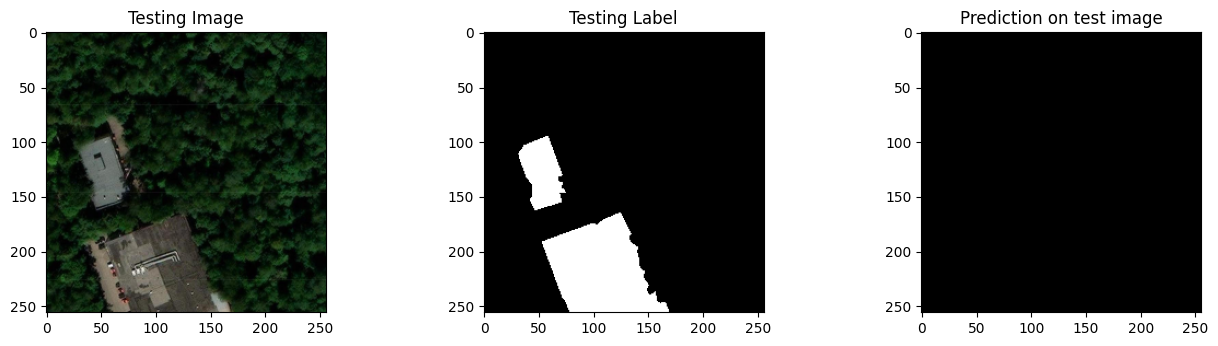

In [27]:
for i in range(1):
  threshold = 0.5
  test_img_number = random.randint(0, len(X_test)-1)
  test_img = X_test[test_img_number]
  ground_truth=y_test[test_img_number]
  test_img_input=np.expand_dims(test_img, 0)
  print(test_img_input.shape)
  prediction = (model.predict(test_img_input)[0,:,:,:] > 0.5).astype(np.uint8)
  print(prediction.shape)

  plt.figure(figsize=(16, 8))
  plt.subplot(231)
  plt.title('Testing Image')
  plt.imshow(test_img[:,:])
  plt.subplot(232)
  plt.title('Testing Label')

  plt.imshow(ground_truth[:,:,0], cmap='gray')
  plt.subplot(233)
  plt.title('Prediction on test image')
  plt.imshow(prediction[:,:,0], cmap='gray')

  plt.show()

  # im = Image.fromarray((test_img[:,:]*255).astype(np.uint8))
  # ref = Image.fromarray((ground_truth[:,:,0]*255).astype(np.uint8))
  # res = Image.fromarray((prediction[:,:,0]*255).astype(np.uint8))
  # im.save(f"/content/drive/MyDrive/Colab Notebooks/SatelliteBuildingRecognition/unet/im{test_img_number}.png")
  # ref.save(f"/content/drive/MyDrive/Colab Notebooks/SatelliteBuildingRecognition/unet/ref{test_img_number}.png")
  # res.save(f"/content/drive/MyDrive/Colab Notebooks/SatelliteBuildingRecognition/unet/res{test_img_number}.png")

In [ ]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()